<a href="https://colab.research.google.com/github/umabhargavi20/IDS/blob/main/IDS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Intrusion Detection System using Naive Bayes Algorithm

We are going to solve this detection problem using Naives Bayes Algorithm
We recoomend you to install anaconda upyter notebook

We can get the [dataset](https://www.kaggle.com/kiranmahesh/nslkdd) here

## Import Libraries

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [ ]:
a='/content/drive/MyDrive/kdd_train.csv'

Here we imported NumPy which is a fundamental package for scientific computing in Python.
This strong python library allows us to perform mathematical operations on large data. If you installed Anaconda, NumPy comes by default. No need to install this package again.

Here we imported pandas to perform data manipulations and analysis. It offers an easy way of handling numerical tables and time series. Pandas package need to be installed on your PC to import it. [You can install pandas here](https://pandas.pydata.org/pandas-docs/version/0.24/install.html)

We imported seaborn. It allows us to visualize the data with its strong data plotting functions.
seaborn need to be installed on your PC if you are new to the field. [You can install seaborn here](https://seaborn.pydata.org/installing.html).

We imported matplotlib which is a plotting library for the python. It comes with Anaconda itself.

We used %matplotlib inline to see the plots in the cells.


In [ ]:
df_train=pd.read_csv(a)
df_train.shape  # Read the train csv

(125973, 42)

In [ ]:
b='/content/drive/MyDrive/kdd_test.csv'

In [ ]:
df_test=pd.read_csv(b)
df_test.shape # Read the test csv

(22544, 42)

In [ ]:
df=pd.concat([df_train,df_test]) # Concate train and test csv into a single dataframe

In [ ]:
df.head() # Observe few rows

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,root_shell,su_attempted,num_root,num_file_creations,num_shells,num_access_files,num_outbound_cmds,is_host_login,is_guest_login,count,srv_count,serror_rate,srv_serror_rate,rerror_rate,srv_rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,labels
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,2,0.0,0.0,0.0,0.0,1.00,0.00,0.00,150,25,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal
1,0,udp,other,SF,146,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,13,1,0.0,0.0,0.0,0.0,0.08,0.15,0.00,255,1,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal
2,0,tcp,private,S0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,123,6,1.0,1.0,0.0,0.0,0.05,0.07,0.00,255,26,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,neptune
3,0,tcp,http,SF,232,8153,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,5,5,0.2,0.2,0.0,0.0,1.00,0.00,0.00,30,255,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal
4,0,tcp,http,SF,199,420,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,30,32,0.0,0.0,0.0,0.0,1.00,0.00,0.09,255,255,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal


In [ ]:
df.shape # See the size of data

(148517, 42)

In [ ]:
pd.set_option('display.max.columns',100) # make column display to 100

In [ ]:
df.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,root_shell,su_attempted,num_root,num_file_creations,num_shells,num_access_files,num_outbound_cmds,is_host_login,is_guest_login,count,srv_count,serror_rate,srv_serror_rate,rerror_rate,srv_rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,labels
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,2,0.0,0.0,0.0,0.0,1.00,0.00,0.00,150,25,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal
1,0,udp,other,SF,146,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,13,1,0.0,0.0,0.0,0.0,0.08,0.15,0.00,255,1,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal
2,0,tcp,private,S0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,123,6,1.0,1.0,0.0,0.0,0.05,0.07,0.00,255,26,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,neptune
3,0,tcp,http,SF,232,8153,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,5,5,0.2,0.2,0.0,0.0,1.00,0.00,0.00,30,255,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal
4,0,tcp,http,SF,199,420,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,30,32,0.0,0.0,0.0,0.0,1.00,0.00,0.09,255,255,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal


In [ ]:
df.info() # Get basic information about the data

<class 'pandas.core.frame.DataFrame'>
Int64Index: 148517 entries, 0 to 22543
Data columns (total 42 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   duration                     148517 non-null  int64  
 1   protocol_type                148517 non-null  object 
 2   service                      148517 non-null  object 
 3   flag                         148517 non-null  object 
 4   src_bytes                    148517 non-null  int64  
 5   dst_bytes                    148517 non-null  int64  
 6   land                         148517 non-null  int64  
 7   wrong_fragment               148517 non-null  int64  
 8   urgent                       148517 non-null  int64  
 9   hot                          148517 non-null  int64  
 10  num_failed_logins            148517 non-null  int64  
 11  logged_in                    148517 non-null  int64  
 12  num_compromised              148517 non-null  int64  
 13  

In [ ]:
df.isnull().sum() # Check for null values

duration                       0
protocol_type                  0
service                        0
flag                           0
src_bytes                      0
dst_bytes                      0
land                           0
wrong_fragment                 0
urgent                         0
hot                            0
num_failed_logins              0
logged_in                      0
num_compromised                0
root_shell                     0
su_attempted                   0
num_root                       0
num_file_creations             0
num_shells                     0
num_access_files               0
num_outbound_cmds              0
is_host_login                  0
is_guest_login                 0
count                          0
srv_count                      0
serror_rate                    0
srv_serror_rate                0
rerror_rate                    0
srv_rerror_rate                0
same_srv_rate                  0
diff_srv_rate                  0
srv_diff_h

In [ ]:
df.describe() # Get the data discription

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,root_shell,su_attempted,num_root,num_file_creations,num_shells,num_access_files,num_outbound_cmds,is_host_login,is_guest_login,count,srv_count,serror_rate,srv_serror_rate,rerror_rate,srv_rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate
count,148517.000000,1.485170e+05,1.485170e+05,148517.000000,148517.000000,148517.000000,148517.000000,148517.000000,148517.000000,148517.000000,148517.000000,148517.000000,148517.000000,148517.000000,148517.000000,148517.000000,148517.0,148517.000000,148517.000000,148517.000000,148517.000000,148517.000000,148517.000000,148517.000000,148517.000000,148517.000000,148517.000000,148517.000000,148517.000000,148517.000000,148517.000000,148517.000000,148517.000000,148517.000000,148517.000000,148517.000000,148517.000000,148517.000000
mean,282.850980,4.051230e+04,1.722710e+04,0.000182,0.021822,0.000121,0.196994,0.002370,0.397308,0.276231,0.001448,0.001098,0.298525,0.012147,0.000458,0.004101,0.0,0.000013,0.010208,84.046729,27.926702,0.276324,0.274494,0.125636,0.126641,0.664048,0.064439,0.096870,182.866870,116.787910,0.524935,0.083248,0.147277,0.031895,0.276092,0.270477,0.124323,0.125298
std,2545.220043,5.409528e+06,3.703596e+06,0.013482,0.248406,0.014678,2.087903,0.058437,0.489342,22.490762,0.038021,0.045155,22.999664,0.468356,0.023778,0.099098,0.0,0.003670,0.100516,115.287822,73.544207,0.442347,0.442972,0.326640,0.329570,0.438869,0.184633,0.258977,98.964628,110.868085,0.448749,0.190616,0.308485,0.111598,0.440218,0.441200,0.312011,0.324583
min,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.100000,0.000000,0.000000,84.000000,11.000000,0.050000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,4.400000e+01,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,14.000000,7.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,255.000000,65.000000,0.540000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,2.760000e+02,5.270000e+02,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,143.000000,18.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.060000,0.000000,255.000000,255.000000,1.000000,0.070000,0.060000,0.020000,1.000000,1.000000,0.000000,0.000000
max,54451.000000,1.379964e+09,1.309937e+09,1.000000,3.000000,3.000000,77.000000,5.000000,1.000000,7479.000000,1.000000,2.000000,7468.000000,43.000000,2.000000,9.000000,0.0,1.000000,1.000000,511.000000,511.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,255.000000,255.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
len(df['labels'].unique()) # Find the unique labels in data

37

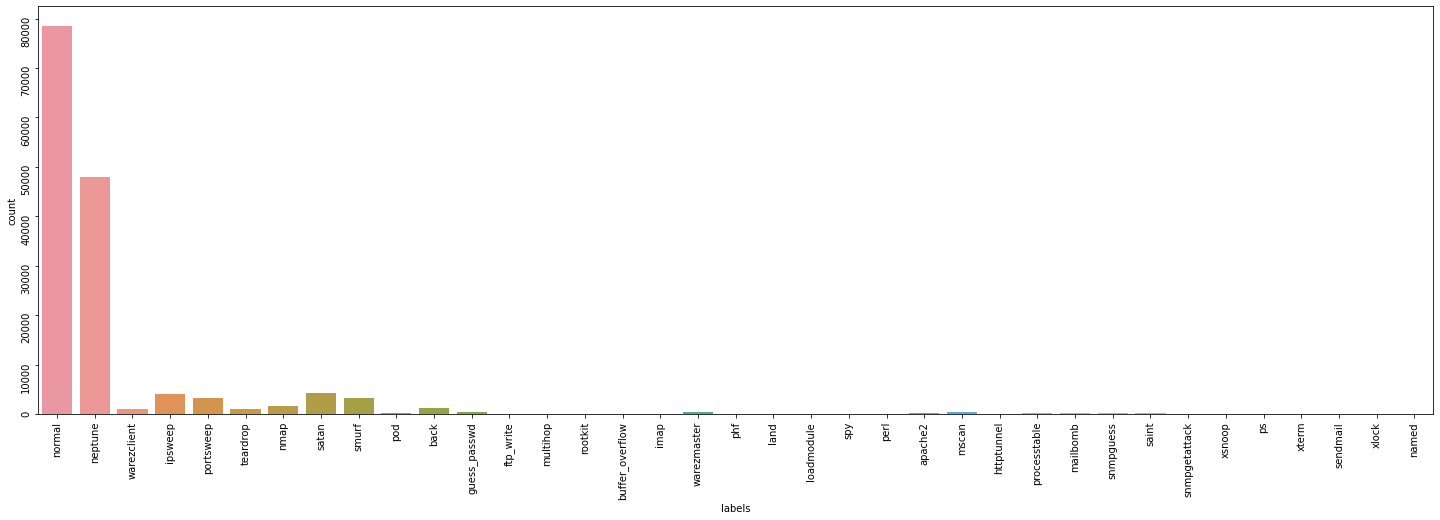

In [ ]:
fig,ax=plt.subplots(figsize=(25,7.5))
sns.countplot(x='labels',data=df,ax=ax)
ax.tick_params(labelrotation=90) # See the distribution of labels

We can observe that neptune and normal are having more frequency. We need to balance the dataset

We are grouping frequent labels into 4 categories namely normal, dos,probe, other

In [ ]:
df['labels'].unique()

array(['normal', 'neptune', 'warezclient', 'ipsweep', 'portsweep',
       'teardrop', 'nmap', 'satan', 'smurf', 'pod', 'back',
       'guess_passwd', 'ftp_write', 'multihop', 'rootkit',
       'buffer_overflow', 'imap', 'warezmaster', 'phf', 'land',
       'loadmodule', 'spy', 'perl', 'apache2', 'mscan', 'httptunnel',
       'processtable', 'mailbomb', 'snmpguess', 'saint', 'snmpgetattack',
       'xsnoop', 'ps', 'xterm', 'sendmail', 'xlock', 'named'],
      dtype=object)

In [ ]:
k=[]
for i in df['labels']:
    if i=='normal':
        k.append('normal')
    elif i=='neptune' or i=='smurf' or i=='pod' or i=='teardrop' or i=='back' or i=='land' or i=='mailbomb' or i=='processtable' or i=='apache2' or i=='worm':
        k.append('dos')
    elif i=='satan' or i=='ipsweep' or i=='portsweep' or i=='nmap' or i=='mscan' or i=='saint':
        k.append('probe')
    elif i=='guess_passwd' or i=='ftp_write' or i=='imap' or i=='phf' or i=='multihop' or i=='warezmaster' or i=='xlock' or i=='xsnoop' or i=='snmpguess' or i=='snmpgetattack' or i=='httptunnel' or i=='sendmail' or i=='named':
        k.append('r2l')
    elif i=='buffer_overflow' or i=='loadmodule'  or i=='rootkit' or i=='perl' or i=='sqlattack' or i=='sqlattack' or i=='xterm' or i=='ps':
        k.append('u2r')
    else:
        k.append('other')

In [ ]:
k=pd.Series(k)

In [ ]:
df['labels']=k

In [ ]:
df['labels'].isna().sum()

0

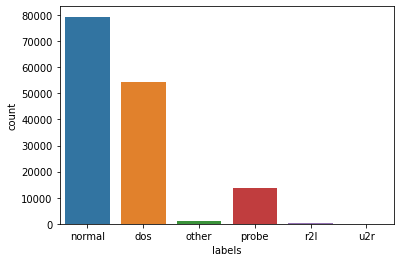

In [ ]:
sns.countplot(x=df['labels'],data=df)

## Data Preprocessing

In [ ]:
proc_df=df.copy()  # Make a copy of dataset

In [ ]:
proc_df_normal_slice=proc_df[proc_df['labels']=='normal'].copy() # Copy this column


In [ ]:
proc_df_dos_slice=proc_df[proc_df['labels']=='dos'].copy() #  Copy this column

In [ ]:
proc_df_probe_slice=proc_df[proc_df['labels']=='probe'].copy()# Copy this column

In [ ]:
proc_df_other_slice=proc_df[proc_df['labels']=='other'].copy() # Copy this column

Slice the columns individually and select samples, downsample normal, neptune and upsample remaining columns

In [ ]:
random_state=42
n=40000
proc_normal_sampled=proc_df_normal_slice.sample(n=n,random_state=random_state)
proc_dos_sampled=proc_df_dos_slice.sample(n=n,random_state=random_state)
proc_probe_sampled=proc_df_probe_slice.sample(n=n,random_state=random_state,replace=True)
proc_other_sampled=proc_df_other_slice.sample(n=n,random_state=random_state,replace=True)

proc_df.drop(proc_df.loc[proc_df['labels']=='normal'].index,inplace=True)
proc_df.drop(proc_df.loc[proc_df['labels']=='dos'].index,inplace=True)
proc_df.drop(proc_df.loc[proc_df['labels']=='probe'].index,inplace=True)
proc_df.drop(proc_df.loc[proc_df['labels']=='other'].index,inplace=True)
proc_df=pd.concat([proc_df,proc_normal_sampled,proc_dos_sampled,proc_probe_sampled,proc_other_sampled],axis=0)

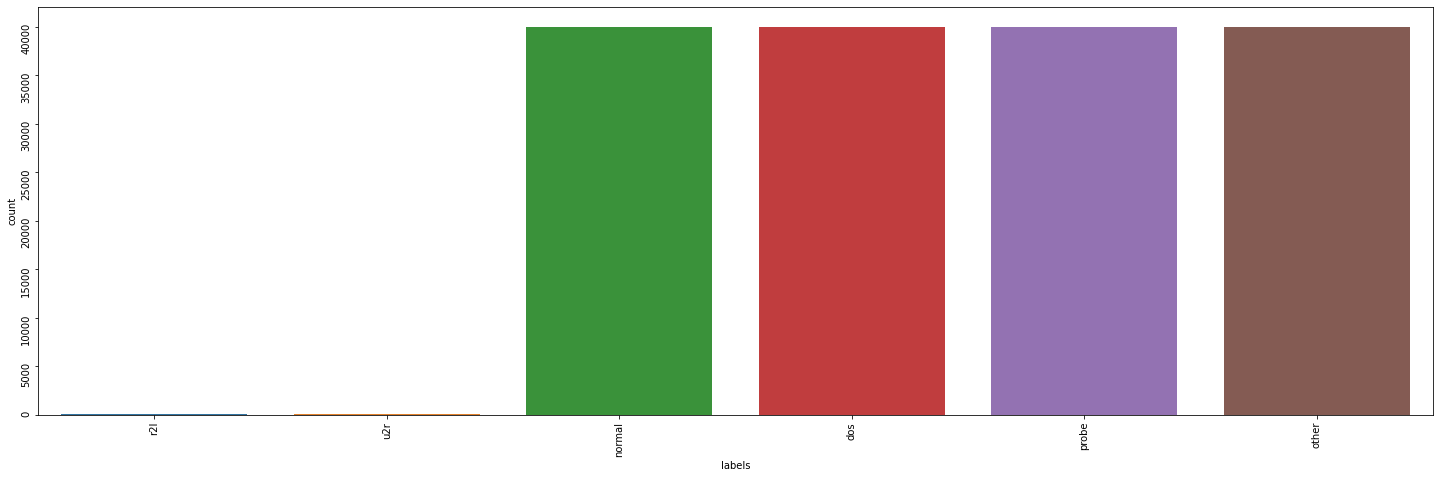

In [ ]:
fig,ax=plt.subplots(figsize=(25,7.5))
sns.countplot(x='labels',data=proc_df)
ax.tick_params(labelrotation=90) # Now see the label distribution

In [ ]:
proc_df.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,root_shell,su_attempted,num_root,num_file_creations,num_shells,num_access_files,num_outbound_cmds,is_host_login,is_guest_login,count,srv_count,serror_rate,srv_serror_rate,rerror_rate,srv_rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,labels
689,0,tcp,telnet,RSTO,125,179,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,1,0.0,0.0,1.0,1.0,1.0,0.0,0.0,4,4,1.00,0.00,0.25,0.0,0.25,0.25,0.75,0.75,r2l
2294,32,tcp,ftp,SF,104,449,0,0,0,2,0,1,0,0,0,0,1,0,1,0,0,1,1,1,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1,1,1.00,0.00,1.00,0.0,0.00,0.00,0.00,0.00,r2l
2798,0,tcp,telnet,RSTO,126,179,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,2,2,0.0,0.0,1.0,1.0,1.0,0.0,0.0,13,13,1.00,0.00,0.08,0.0,0.08,0.08,0.92,0.92,r2l
3005,718,tcp,telnet,SF,1412,25260,0,0,0,15,0,1,38,1,0,54,4,1,2,0,0,0,1,1,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1,1,1.00,0.00,1.00,0.0,0.00,0.00,0.00,0.00,r2l
3173,98,tcp,telnet,SF,621,8356,0,0,1,1,0,1,5,1,0,14,1,0,0,0,0,0,1,1,0.0,0.0,0.0,0.0,1.0,0.0,0.0,255,4,0.02,0.02,0.00,0.0,0.00,0.00,0.00,0.00,u2r


In [ ]:
from sklearn.preprocessing import MinMaxScaler
ss=MinMaxScaler()
col_to_scale=proc_df.columns[4:-1]
proc_df[col_to_scale]=ss.fit_transform(proc_df[col_to_scale]) # Scale the dataset

In [ ]:
proc_df['duration']=ss.fit_transform(proc_df[['duration']])

In [ ]:
proc_df.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,root_shell,su_attempted,num_root,num_file_creations,num_shells,num_access_files,num_outbound_cmds,is_host_login,is_guest_login,count,srv_count,serror_rate,srv_serror_rate,rerror_rate,srv_rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,labels
689,0.000000,tcp,telnet,RSTO,9.058208e-08,1.366478e-07,0.0,0.0,0.0,0.012987,0.2,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.001957,0.001957,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.011811,0.011811,1.00,0.00,0.25,0.0,0.25,0.25,0.75,0.75,r2l
2294,0.000746,tcp,ftp,SF,7.536429e-08,3.427645e-07,0.0,0.0,0.0,0.025974,0.0,1.0,0.000000,0.0,0.0,0.000000,0.023256,0.0,0.111111,0.0,0.0,1.0,0.001957,0.001957,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.000000,0.000000,1.00,0.00,1.00,0.0,0.00,0.00,0.00,0.00,r2l
2798,0.000000,tcp,telnet,RSTO,9.130674e-08,1.366478e-07,0.0,0.0,0.0,0.012987,0.2,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.003914,0.003914,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.047244,0.047244,1.00,0.00,0.08,0.0,0.08,0.08,0.92,0.92,r2l
3005,0.016733,tcp,telnet,SF,1.023215e-06,1.928336e-05,0.0,0.0,0.0,0.194805,0.0,1.0,0.021852,1.0,0.0,0.030981,0.093023,0.5,0.222222,0.0,0.0,0.0,0.001957,0.001957,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.000000,0.000000,1.00,0.00,1.00,0.0,0.00,0.00,0.00,0.00,r2l
3173,0.002284,tcp,telnet,SF,4.500118e-07,6.378931e-06,0.0,0.0,0.5,0.012987,0.0,1.0,0.002875,1.0,0.0,0.008032,0.023256,0.0,0.000000,0.0,0.0,0.0,0.001957,0.001957,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.000000,0.011811,0.02,0.02,0.00,0.0,0.00,0.00,0.00,0.00,u2r


In [ ]:
protocol_dummies=pd.get_dummies(proc_df['protocol_type'],prefix='protocol_type')
service_dummies=pd.get_dummies(proc_df['service'],prefix='service')
flag_dummies=pd.get_dummies(proc_df['flag'],prefix='flag')
proc_df=pd.concat([proc_df,protocol_dummies,service_dummies,flag_dummies],axis=1) # Perform one-hot encoding for categorical data

We need not to worry about the increase in feature dimensionality. In this project we use Prinicipal Component Analysis to reduce the dimensionality of dataset

In [ ]:
proc_df.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,root_shell,su_attempted,num_root,num_file_creations,num_shells,num_access_files,num_outbound_cmds,is_host_login,is_guest_login,count,srv_count,serror_rate,srv_serror_rate,rerror_rate,srv_rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,labels,protocol_type_icmp,protocol_type_tcp,protocol_type_udp,service_IRC,service_X11,service_Z39_50,service_aol,service_auth,...,service_kshell,service_ldap,service_link,service_login,service_mtp,service_name,service_netbios_dgm,service_netbios_ns,service_netbios_ssn,service_netstat,service_nnsp,service_nntp,service_ntp_u,service_other,service_pm_dump,service_pop_2,service_pop_3,service_printer,service_private,service_red_i,service_remote_job,service_rje,service_shell,service_smtp,service_sql_net,service_ssh,service_sunrpc,service_supdup,service_systat,service_telnet,service_tftp_u,service_tim_i,service_time,service_urh_i,service_urp_i,service_uucp,service_uucp_path,service_vmnet,service_whois,flag_OTH,flag_REJ,flag_RSTO,flag_RSTOS0,flag_RSTR,flag_S0,flag_S1,flag_S2,flag_S3,flag_SF,flag_SH
689,0.000000,tcp,telnet,RSTO,9.058208e-08,1.366478e-07,0.0,0.0,0.0,0.012987,0.2,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.001957,0.001957,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.011811,0.011811,1.00,0.00,0.25,0.0,0.25,0.25,0.75,0.75,r2l,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
2294,0.000746,tcp,ftp,SF,7.536429e-08,3.427645e-07,0.0,0.0,0.0,0.025974,0.0,1.0,0.000000,0.0,0.0,0.000000,0.023256,0.0,0.111111,0.0,0.0,1.0,0.001957,0.001957,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.000000,0.000000,1.00,0.00,1.00,0.0,0.00,0.00,0.00,0.00,r2l,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
2798,0.000000,tcp,telnet,RSTO,9.130674e-08,1.366478e-07,0.0,0.0,0.0,0.012987,0.2,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.003914,0.003914,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.047244,0.047244,1.00,0.00,0.08,0.0,0.08,0.08,0.92,0.92,r2l,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
3005,0.016733,tcp,telnet,SF,1.023215e-06,1.928336e-05,0.0,0.0,0.0,0.194805,0.0,1.0,0.021852,1.0,0.0,0.030981,0.093023,0.5,0.222222,0.0,0.0,0.0,0.001957,0.001957,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.000000,0.000000,1.00,0.00,1.00,0.0,0.00,0.00,0.00,0.00,r2l,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
3173,0.002284,tcp,telnet,SF,4.500118e-07,6.378931e-06,0.0,0.0,0.5,0.012987,0.0,1.0,0.002875,1.0,0.0,0.008032,0.023256,0.0,0.000000,0.0,0.0,0.0,0.001957,0.001957,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.000000,0.011811,0.02,0.02,0.00,0.0,0.00,0.00,0.00,0.00,u2r,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0


In [ ]:
proc_df.drop(['protocol_type','service','flag'],axis=1,inplace=True) # Now remove these columns

In [ ]:
proc_df['labels'].unique()

array(['r2l', 'u2r', 'normal', 'dos', 'probe', 'other'], dtype=object)

In [ ]:

proc_df.drop(['is_host_login','num_outbound_cmds'],axis=1,inplace=True) # These two columns don't have any data

In [ ]:
proc_df.shape

(160192, 121)

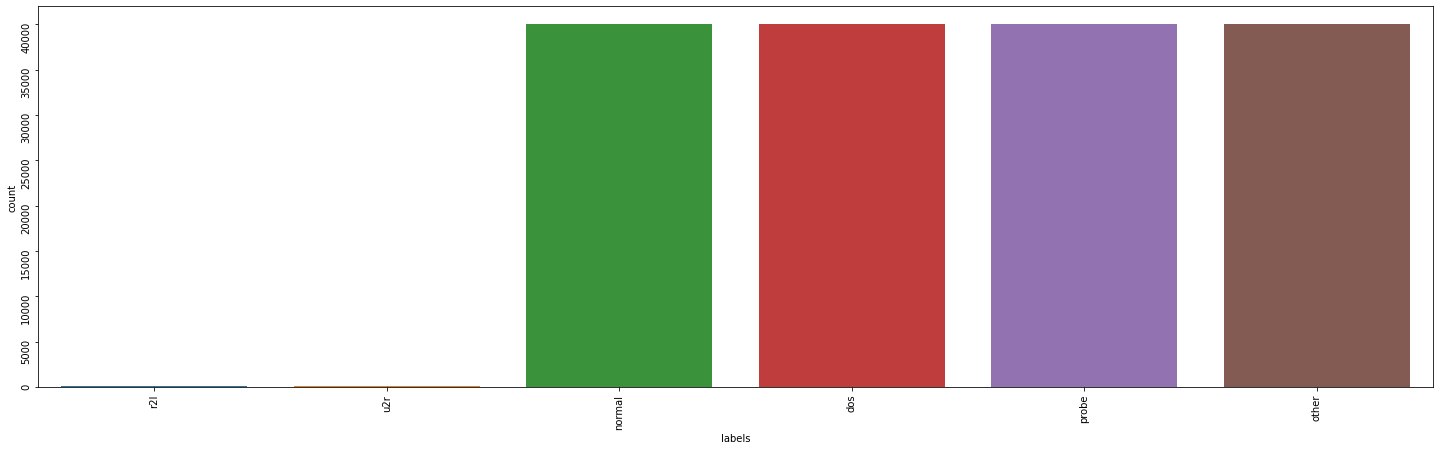

In [ ]:
fig,ax=plt.subplots(figsize=(25,7))
sns.countplot(x='labels',data=proc_df)
ax.tick_params(labelrotation=90)

In [ ]:
x=proc_df.drop('labels',axis=1)
y=proc_df['labels']

In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
le=LabelEncoder() # Encode the labels

In [ ]:
y=le.fit_transform(y)

## Principal Component Analysis

In [ ]:
from sklearn.decomposition import PCA # Import PCA module to perform principal component analysis

In [ ]:
pca=PCA(n_components=10)
pca.fit(x)      # We set n_components=10

PCA(copy=True, iterated_power='auto', n_components=10, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [ ]:
x_pca=pca.transform(x) # now x_pca is our reduced feature set

In [ ]:
x_pca.shape # Many columns are reduced to just 10

(160192, 10)

In [ ]:
x_pca

array([[ 0.21154053,  1.15020647,  0.05461938, ...,  0.53209345,
        -0.76768548, -0.41397546],
       [-1.1025367 , -0.18655392, -0.24745925, ..., -0.05014796,
        -0.13232622,  0.03948288],
       [ 0.18559614,  1.34097799, -0.04106746, ...,  0.51548888,
        -0.82797502, -0.43424487],
       ...,
       [-1.18465318, -0.21141777,  0.00254538, ..., -0.00453754,
        -0.10445937,  0.09747361],
       [-0.64682741, -0.19060347, -0.89910066, ...,  0.01875684,
        -0.17384258,  0.17535023],
       [-0.77042226, -0.20766081, -0.64532625, ...,  0.07941842,
        -0.01698646,  0.13488061]])

## Naive Bayes

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x_pca,y,test_size=0.3,random_state=42) #

In [ ]:
from sklearn.naive_bayes import GaussianNB
model=GaussianNB()
model.fit(x_train,y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [ ]:
y_pred=model.predict(x_test)

In [ ]:
from sklearn.metrics import accuracy_score,confusion_matrix
from sklearn.metrics import classification_report

In [ ]:
acc=accuracy_score(y_test,y_pred)

In [ ]:
acc # Obtain accuracy score

0.8105206209163927

In [ ]:
confusion_matrix(y_test,y_pred) # Confusion matrix

array([[10026,  1459,   115,   403,    12,     0],
       [  704,  9259,  1028,   720,   152,     0],
       [  560,  1076, 10131,   294,    46,     0],
       [ 1354,   960,   138,  9519,    39,     0],
       [    5,     8,     8,     3,    17,     0],
       [    2,     6,    12,     2,     0,     0]])

In [ ]:
print(classification_report(y_test,y_pred)) #Classification report

              precision    recall  f1-score   support

           0       0.79      0.83      0.81     12015
           1       0.73      0.78      0.75     11863
           2       0.89      0.84      0.86     12107
           3       0.87      0.79      0.83     12010
           4       0.06      0.41      0.11        41
           5       0.00      0.00      0.00        22

    accuracy                           0.81     48058
   macro avg       0.56      0.61      0.56     48058
weighted avg       0.82      0.81      0.81     48058



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
